In [2]:
import pandas as pd

train_df = pd.read_csv('../data/processed/combined2_train_data_with_sentiment.csv')
val_df = pd.read_csv('../data/processed/combined2_val_data_with_sentiment.csv')
test_df = pd.read_csv('../data/processed/combined2_test_data_with_sentiment.csv')

In [3]:

# Verificar la distribución de las etiquetas
print(train_df['sentiment_label'].value_counts())
print(train_df['IsHatespeech'].value_counts())
print(train_df.shape)

print(val_df['sentiment_label'].value_counts())
print(val_df['IsHatespeech'].value_counts())
print(val_df.shape)

print(test_df['sentiment_label'].value_counts())
print(test_df['IsHatespeech'].value_counts())
print(test_df.shape)


sentiment_label
NEGATIVE    1069
POSITIVE     191
Name: count, dtype: int64
IsHatespeech
True     743
False    517
Name: count, dtype: int64
(1260, 15)
sentiment_label
NEGATIVE    670
POSITIVE    190
Name: count, dtype: int64
IsHatespeech
True     687
False    173
Name: count, dtype: int64
(860, 15)
sentiment_label
NEGATIVE    674
POSITIVE    186
Name: count, dtype: int64
IsHatespeech
True     688
False    172
Name: count, dtype: int64
(860, 15)


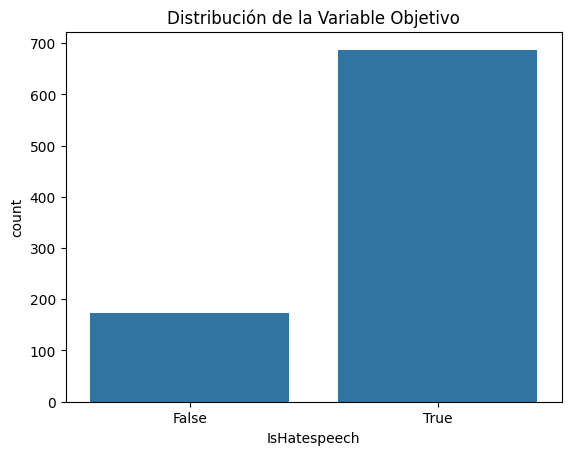

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribución de la variable objetivo
sns.countplot(x='IsHatespeech', data=val_df)
plt.title('Distribución de la Variable Objetivo')
plt.show()

In [5]:
print(test_df.shape)
print(val_df.shape)
print(train_df.shape)
print(test_df['IsHatespeech'].value_counts())

(860, 15)
(860, 15)
(1260, 15)
IsHatespeech
True     688
False    172
Name: count, dtype: int64


In [6]:
import pandas as pd  
 
# Función para equilibrar las clases  
def balance_classes(df, target_class_count):  
    # Filtrar las clases  
    true_samples = df[df['IsHatespeech'] == True]  
    false_samples = df[df['IsHatespeech'] == False]  
    
    # Reducir las muestras de la clase True  
    true_samples_balanced = true_samples.sample(n=target_class_count, random_state=42)  
    
    # Mantener todas las muestras de la clase False  
    false_samples_balanced = false_samples.sample(n=target_class_count, random_state=42)  
    
    # Combinar las muestras balanceadas  
    balanced_df = pd.concat([true_samples_balanced, false_samples_balanced])  
    
    # Barajar el DataFrame final  
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)  
    
    return balanced_df  

# Balancear val_df y test_df  
val_df_balanced = balance_classes(val_df, 172)  
test_df_balanced = balance_classes(test_df, 172)  

# Verificar el resultado  
print("val_df_balanced:")  
print(val_df_balanced['IsHatespeech'].value_counts())  
print(val_df_balanced.shape)  

print("\ntest_df_balanced:")  
print(test_df_balanced['IsHatespeech'].value_counts())  
print(test_df_balanced.shape)  

# Guardar DataFrames como CSV  
output_directory = r"C:\Users\samir\Detector de odio\Detector_de_odio_G1\data\processed"  
val_df_balanced.to_csv(f"{output_directory}\\val_df_balanced.csv", index=False)  
test_df_balanced.to_csv(f"{output_directory}\\test_df_balanced.csv", index=False)  

print(f"\nArchivos guardados en {output_directory}")

val_df_balanced:
IsHatespeech
False    172
True     172
Name: count, dtype: int64
(344, 15)

test_df_balanced:
IsHatespeech
False    172
True     172
Name: count, dtype: int64
(344, 15)

Archivos guardados en C:\Users\samir\Detector de odio\Detector_de_odio_G1\data\processed


In [7]:
print(train_df.columns)
print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())

Index(['semantic_tokens', 'IsHatespeech', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsRacist', 'IsNationalist', 'IsSexist',
       'IsHomophobic', 'IsReligiousHate', 'IsRadicalism', 'sentiment_label',
       'sentiment_score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   semantic_tokens  1260 non-null   object 
 1   IsHatespeech     1260 non-null   bool   
 2   IsToxic          660 non-null    object 
 3   IsAbusive        660 non-null    object 
 4   IsThreat         660 non-null    object 
 5   IsProvocative    660 non-null    object 
 6   IsObscene        660 non-null    object 
 7   IsRacist         660 non-null    object 
 8   IsNationalist    660 non-null    object 
 9   IsSexist         660 non-null    object 
 10  IsHomophobic     660 non-null    object 
 11  IsReligi

In [8]:
train_df1=train_df.fillna(False)
val_df1=val_df.fillna(False)
test_df1=test_df.fillna(False)
print(train_df1.isnull().sum())
train_df1.to_csv('../data/processed/train_data1.csv', index=False) 
val_df1.to_csv('../data/processed/val_data1.csv', index=False) 
test_df1.to_csv('../data/processed/test_data1.csv', index=False)




semantic_tokens    0
IsHatespeech       0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
sentiment_label    0
sentiment_score    0
dtype: int64


C:\Users\samir\AppData\Local\Temp\ipykernel_17456\628830004.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df1=train_df.fillna(False)
C:\Users\samir\AppData\Local\Temp\ipykernel_17456\628830004.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val_df1=val_df.fillna(False)
C:\Users\samir\AppData\Local\Temp\ipykernel_17456\628830004.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, se

In [34]:
train_df = pd.read_csv('../data/processed/train_data1_processed.csv')
val_df = pd.read_csv('../data/processed/val_data1_processed.csv')
test_df = pd.read_csv('../data/processed/test_data1_processed.csv')

train_df = train_df.dropna(subset=['processed_text'])
val_df=val_df.dropna(subset=['processed_text'])
test_df = test_df.dropna(subset=['processed_text'])


# Contar filas donde 'processed_text' tiene palabras largas
problematic_texts = train_df[train_df['processed_text'].str.contains(r'\w{50,}', na=False)]
print(f"Filas problemáticas en 'processed_text': {len(problematic_texts)}")

# Contar filas donde 'cleaned_text' tiene palabras largas
problematic_texts1 = train_df[train_df['cleaned_text'].str.contains(r'\w{50,}', na=False)]
print(f"Filas problemáticas en 'cleaned_text': {len(problematic_texts1)}")

# Eliminar filas donde 'processed_text' tiene palabras largas
train_df = train_df[~train_df['processed_text'].str.contains(r'\w{50,}', na=False)]
val_df = val_df[~val_df['processed_text'].str.contains(r'\w{50,}', na=False)]
test_df= test_df[~test_df['processed_text'].str.contains(r'\w{50,}', na=False)]
# Eliminar filas donde 'cleaned_text' tiene palabras largas
train_df = train_df[~train_df['cleaned_text'].str.contains(r'\w{50,}', na=False)]
val_df= val_df[~val_df['cleaned_text'].str.contains(r'\w{50,}', na=False)]
test_df= test_df[~test_df['cleaned_text'].str.contains(r'\w{50,}', na=False)]
# Verificar el tamaño del DataFrame después de eliminar las filas
print(f"Filas restantes después de eliminar filas problemáticas: {len(train_df)}")


Filas problemáticas en 'processed_text': 12
Filas problemáticas en 'cleaned_text': 15
Filas restantes después de eliminar filas problemáticas: 1211


In [35]:

print(train_df.columns)
print(train_df.isnull().sum())
print(val_df.isnull().sum())
print(test_df.isnull().sum())

Index(['semantic_tokens', 'IsHatespeech', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsRacist', 'IsNationalist', 'IsSexist',
       'IsHomophobic', 'IsReligiousHate', 'IsRadicalism', 'sentiment_label',
       'sentiment_score', 'cleaned_text', 'processed_text'],
      dtype='object')
semantic_tokens    0
IsHatespeech       0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
sentiment_label    0
sentiment_score    0
cleaned_text       0
processed_text     0
dtype: int64
semantic_tokens    0
IsHatespeech       0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
sentiment_label    0
sentiment_score    0

In [38]:
print(train_df.info())
print(train_df.describe())
print(val_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 0 to 1258
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   semantic_tokens  1211 non-null   object 
 1   IsHatespeech     1211 non-null   bool   
 2   IsToxic          1211 non-null   bool   
 3   IsAbusive        1211 non-null   bool   
 4   IsThreat         1211 non-null   bool   
 5   IsProvocative    1211 non-null   bool   
 6   IsObscene        1211 non-null   bool   
 7   IsRacist         1211 non-null   bool   
 8   IsNationalist    1211 non-null   bool   
 9   IsSexist         1211 non-null   bool   
 10  IsHomophobic     1211 non-null   bool   
 11  IsReligiousHate  1211 non-null   bool   
 12  IsRadicalism     1211 non-null   bool   
 13  sentiment_label  1211 non-null   object 
 14  sentiment_score  1211 non-null   float64
 15  cleaned_text     1211 non-null   object 
 16  processed_text   1211 non-null   object 
dtypes: bool(12), float6

In [39]:
train_df.to_csv('../data/processed/train_data1.csv', index=False) 
val_df.to_csv('../data/processed/val_data1.csv', index=False) 
test_df.to_csv('../data/processed/test_data1.csv', index=False)


In [40]:
print(train_df.head(5))

                                     semantic_tokens  IsHatespeech  IsToxic  \
0  ['WHITE', 'FINISH', 'SENTENCE', 'WAKE', 'TRUTH...          True     True   
1                                ['MUSLIM', 'BITCH']          True     True   
2  ['WANT', 'SON', 'DEATH', 'VAIN', 'LET', 'BURN'...         False     True   
3  ['TRUE', 'POLICE', 'ORIGINALLY', 'SAY', 'ROBBE...         False    False   
4  ['POINT', 'THINK', 'COP', 'POINT', 'GUN', 'KNO...         False    False   

   IsAbusive  IsThreat  IsProvocative  IsObscene  IsRacist  IsNationalist  \
0       True     False          False      False      True          False   
1      False     False          False      False     False          False   
2       True     False          False       True     False          False   
3      False     False          False      False     False          False   
4      False     False          False      False     False          False   

   IsSexist  IsHomophobic  IsReligiousHate  IsRadicalism senti